# **DRAFT UAS**

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
import mysql.connector
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os


In [3]:
# mydb = mysql.connector.connect(
#   host="localhost",
#   user="root",
#   password="",
#   database="dw_aw"
# )

### Engine

##### local

In [4]:
engine = create_engine("mysql+mysqlconnector://root:@localhost/adventureworks_dw")

##### cloud

In [16]:
load_dotenv()
db_url = os.getenv('DATABASE_URL')
engine = create_engine(f'{db_url}')

## Read Data

#### Tabel Fakta

In [15]:
fact_finance_df = pd.read_sql("SELECT * FROM factfinance", engine)
fact_finance_df.head()

,TimeKey,OrganizationKey,DepartmentGroupKey,ScenarioKey,AccountKey,Amount
0,1,3,6,1,99,45000.0
1,32,3,6,1,99,45000.0
2,63,3,6,1,99,45000.0
3,216,3,6,1,99,45000.0
4,244,3,6,1,99,45000.0


In [5]:
fact_internet_sales = pd.read_sql("SELECT * FROM factinternetsales", engine)
fact_internet_sales.head()

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,...,ExtendedAmount,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber
0,346,1,13,8,11003,1,6,9,SO43701,1,...,3400.0,0.0,0.0,1912.0,1912.0,3400.0,272.0,85.0,None,None
1,336,1,13,8,14501,1,100,4,SO43700,1,...,699.0,0.0,0.0,413.0,413.0,699.0,56.0,17.0,None,None
2,310,1,13,8,21768,1,19,6,SO43697,1,...,3578.0,0.0,0.0,2171.0,2171.0,3578.0,286.0,89.0,None,None
3,346,1,13,8,25863,1,100,1,SO43699,1,...,3400.0,0.0,0.0,1912.0,1912.0,3400.0,272.0,85.0,None,None
4,346,1,13,8,28389,1,39,7,SO43698,1,...,3400.0,0.0,0.0,1912.0,1912.0,3400.0,272.0,85.0,None,None


#### Tabel Dimensi

In [7]:
dimention_time_df = pd.read_sql("SELECT * FROM dimtime", engine)
dimention_time_df.head()

,TimeKey,FullDateAlternateKey,DayNumberOfWeek,EnglishDayNameOfWeek,SpanishDayNameOfWeek,FrenchDayNameOfWeek,DayNumberOfMonth,DayNumberOfYear,WeekNumberOfYear,EnglishMonthName,SpanishMonthName,FrenchMonthName,MonthNumberOfYear,CalendarQuarter,CalendarYear,CalendarSemester,FiscalQuarter,FiscalYear,FiscalSemester
0,1,2001-07-01 12:00:00,1,Sunday,Domingo,Dimanche,1,182,27,July,Julio,Juillet,7,3,2001,2,1,2002,1
1,2,2001-07-02 12:00:00,2,Monday,Lunes,Lundi,2,183,27,July,Julio,Juillet,7,3,2001,2,1,2002,1
2,3,2001-07-03 12:00:00,3,Tuesday,Martes,Mardi,3,184,27,July,Julio,Juillet,7,3,2001,2,1,2002,1
3,4,2001-07-04 12:00:00,4,Wednesday,Mi├®rcoles,Mercredi,4,185,27,July,Julio,Juillet,7,3,2001,2,1,2002,1
4,5,2001-07-05 12:00:00,5,Thursday,Jueves,Jeudi,5,186,27,July,Julio,Juillet,7,3,2001,2,1,2002,1


In [8]:
dimention_reseller_df = pd.read_sql("SELECT * FROM dimreseller", engine)
dimention_reseller_df.head()

,ResellerKey,GeographyKey,ResellerAlternateKey,Phone,BusinessType,ResellerName,NumberEmployees,OrderFrequency,OrderMonth,FirstOrderYear,LastOrderYear,ProductLine,AddressLine1,AddressLine2,AnnualSales,BankName,MinPaymentType,MinPaymentAmount,AnnualRevenue,YearOpened
0,1,637,AW00000001,245-555-0173,Value Added Reseller,A Bike Store,2,S,5.0,2001.0,2002.0,Road,2251 Elliot Avenue,None,300000.0,International Bank,NaN,NaN,30000.0,1970
1,2,635,AW00000002,170-555-0127,Specialty Bike Shop,Progressive Sports,10,A,5.0,2002.0,2004.0,Mountain,3207 S Grady Way,None,800000.0,International Security,1.0,NaN,80000.0,1972
2,3,584,AW00000003,279-555-0130,Warehouse,Advanced Bike Components,40,Q,6.0,2001.0,2004.0,Road,12345 Sterling Avenue,None,1500000.0,Primary International,2.0,NaN,150000.0,1974
3,4,572,AW00000004,710-555-0173,Value Added Reseller,Modular Cycle Systems,5,S,4.0,2002.0,2004.0,Road,800 Interchange Blvd.,Suite 2501,300000.0,United Security,3.0,600.0,30000.0,1976
4,5,322,AW00000005,828-555-0186,Specialty Bike Shop,Metropolitan Sports Supply,13,A,6.0,2002.0,2004.0,Road,482505 Warm Springs Blvd.,None,800000.0,Primary Bank and Reserve,NaN,NaN,80000.0,1978


In [9]:
dimention_product_df = pd.read_sql("SELECT * FROM dimproduct", engine)
dimention_product_df.head()

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,WeightUnitMeasureCode,SizeUnitMeasureCode,EnglishProductName,StandardCost,FinishedGoodsFlag,Color,SafetyStockLevel,...,DaysToManufacture,ProductLine,DealerPrice,Class,Style,ModelName,EnglishDescription,StartDate,EndDate,Status
0,214,HL-U509-R,31,None,None,"Sport-100 Helmet, Red",13.0,1,Red,4,...,0,S,21.0,None,None,Sport-100,"Universal fit, well-vented, lightweight , snap...",2003-07-01 12:00:00,NaT,Current
1,217,HL-U509,31,None,None,"Sport-100 Helmet, Black",13.0,1,Black,4,...,0,S,21.0,None,None,Sport-100,"Universal fit, well-vented, lightweight , snap...",2003-07-01 12:00:00,NaT,Current
2,222,HL-U509-B,31,None,None,"Sport-100 Helmet, Blue",13.0,1,Blue,4,...,0,S,21.0,None,None,Sport-100,"Universal fit, well-vented, lightweight , snap...",2003-07-01 12:00:00,NaT,Current
3,225,CA-1098,19,None,None,AWC Logo Cap,7.0,1,Multi,4,...,0,S,5.0,None,U,Cycling Cap,Traditional style with a flip-up brim; one-siz...,2003-07-01 12:00:00,NaT,Current
4,228,LJ-0192-S,21,None,None,"Long-Sleeve Logo Jersey, S",38.0,1,Multi,4,...,0,S,30.0,None,U,Long-Sleeve Logo Jersey,Unisex long-sleeve AWC logo microfiber cycling...,2003-07-01 12:00:00,NaT,Current


In [10]:
dimention_product_category_df = pd.read_sql("SELECT * FROM dimproductcategory", engine)
dimention_product_category_df.head()

,ProductCategoryKey,ProductCategoryAlternateKey,EnglishProductCategoryName,SpanishProductCategoryName,FrenchProductCategoryName
0,1,1,Bikes,Bicicleta,Vélo
1,2,2,Components,Componente,Composant
2,3,3,Clothing,Prenda,Vêtements
3,4,4,Accessories,Accesorio,Accessoire


In [11]:
dimention_product_subcategory_df = pd.read_sql("SELECT * FROM dimproductsubcategory", engine)
dimention_product_subcategory_df.head()

,ProductSubcategoryKey,ProductSubcategoryAlternateKey,EnglishProductSubcategoryName,SpanishProductSubcategoryName,FrenchProductSubcategoryName,ProductCategoryKey
0,1,1,Mountain Bikes,Bicicleta de montaña,VTT,1
1,2,2,Road Bikes,Bicicleta de carretera,Vélo de route,1
2,3,3,Touring Bikes,Bicicleta de paseo,Vélo de randonnée,1
3,4,4,Handlebars,Barra,Barre d'appui,2
4,5,5,Bottom Brackets,Eje de pedalier,Axe de pédalier,2


In [12]:
dimention_promotion_df = pd.read_sql("SELECT * FROM dimpromotion", engine)
dimention_promotion_df.head()

,PromotionKey,PromotionAlternateKey,EnglishPromotionName,SpanishPromotionName,FrenchPromotionName,DiscountPct,EnglishPromotionType,SpanishPromotionType,FrenchPromotionType,EnglishPromotionCategory,SpanishPromotionCategory,FrenchPromotionCategory,StartDate,EndDate,MinQty,MaxQty
0,1,1,No Discount,Sin descuento,Aucune remise,0.00,No Discount,Sin descuento,Aucune remise,No Discount,Sin descuento,Aucune remise,20010601,20041231,0,NaN
1,2,2,Volume Discount 11 to 14,Descuento por volumen (entre 11 y 14),Remise sur quantité (de 11 à 14),0.02,Volume Discount,Descuento por volumen,Remise sur quantité,Reseller,Distribuidor,Revendeur,20010701,20040630,11,14.0
2,3,3,Volume Discount 15 to 24,Descuento por volumen (entre 15 y 24),Remise sur quantité (de 15 à 24),0.05,Volume Discount,Descuento por volumen,Remise sur quantité,Reseller,Distribuidor,Revendeur,20010701,20040630,15,24.0
3,4,4,Volume Discount 25 to 40,Descuento por volumen (entre 25 y 40),Remise sur quantité (de 25 à 40),0.10,Volume Discount,Descuento por volumen,Remise sur quantité,Reseller,Distribuidor,Revendeur,20010701,20040630,25,40.0
4,5,5,Volume Discount 41 to 60,Descuento por volumen (entre 41 y 60),Remise sur quantité (de 41 à 60),0.15,Volume Discount,Descuento por volumen,Remise sur quantité,Reseller,Distribuidor,Revendeur,20010701,20040630,41,60.0


In [13]:
dimention_customer_df = pd.read_sql("SELECT * FROM dimcustomer", engine)

## Assess Data

In [14]:
fact_finance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39409 entries, 0 to 39408
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TimeKey             39409 non-null  int64  
 1   OrganizationKey     39409 non-null  int64  
 2   DepartmentGroupKey  39409 non-null  int64  
 3   ScenarioKey         39409 non-null  int64  
 4   AccountKey          39409 non-null  int64  
 5   Amount              39409 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 1.8 MB


In [15]:
fact_finance_df.describe()

,TimeKey,OrganizationKey,DepartmentGroupKey,ScenarioKey,AccountKey,Amount
count,39409.000000,39409.000000,39409.000000,39409.000000,39409.000000,3.940900e+04
mean,536.921566,6.915781,4.412038,1.122967,66.276790,3.447538e+04
std,321.488175,2.927269,2.375372,0.328403,23.911898,1.640419e+05
min,1.000000,3.000000,1.000000,1.000000,4.000000,-1.121920e+06
25%,244.000000,5.000000,2.000000,1.000000,60.000000,1.071400e+02
50%,550.000000,6.000000,6.000000,1.000000,72.000000,3.800000e+02
75%,823.000000,8.000000,6.000000,1.000000,83.000000,9.056250e+03
max,1096.000000,13.000000,7.000000,2.000000,101.000000,4.820990e+06


In [16]:
fact_finance_df.duplicated().sum()

0

In [17]:
fact_finance_df.isna().sum()

TimeKey               0
OrganizationKey       0
DepartmentGroupKey    0
ScenarioKey           0
AccountKey            0
Amount                0
dtype: int64

## VISUALISASI

### Comparison

#### tren penjualan (factinternetsales X dimtime)

In [42]:
tren_penjualan = fact_internet_sales.merge(dimention_time_df, left_on='OrderDateKey', right_on='TimeKey')
tren_penjualan = tren_penjualan.groupby('CalendarYear').agg({'SalesAmount': 'sum'}).reset_index()

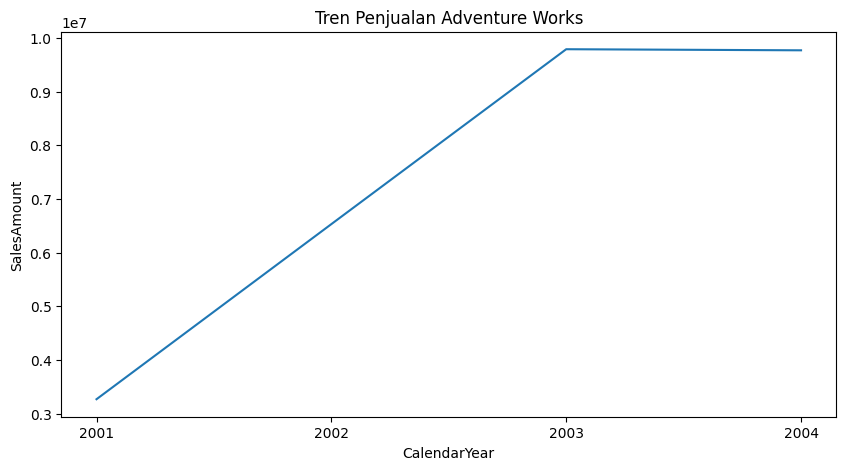

In [19]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=tren_penjualan, x='CalendarYear', y='SalesAmount')
plt.title('Tren Penjualan Adventure Works')
plt.show()

#### produk paling laris (factinternetsales X dimproduct X dimproductcategory)

In [20]:
top_product = fact_internet_sales.merge(dimention_product_df, left_on='ProductKey', right_on='ProductKey')
top_subcategory = top_product.merge(dimention_product_subcategory_df, left_on='ProductSubcategoryKey', right_on='ProductSubcategoryKey')

In [21]:
top_subcategory = top_subcategory.groupby('EnglishProductSubcategoryName').agg({'SalesAmount': 'sum'}).reset_index()
top_subcategory = top_subcategory.sort_values('SalesAmount', ascending=False).head(10)
top_subcategory

,EnglishProductSubcategoryName,SalesAmount
11,Road Bikes,14519438.0
10,Mountain Bikes,9952254.0
15,Touring Bikes,3844580.0
14,Tires and Tubes,244544.0
7,Helmets,225400.0
9,Jerseys,172984.0
12,Shorts,71330.0
2,Bottles and Cages,56878.0
5,Fenders,46662.0
8,Hydration Packs,40315.0


C:\Users\RIZKA F\AppData\Local\Temp\ipykernel_11808\743083681.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_subcategory, x='SalesAmount', y='EnglishProductSubcategoryName', palette='viridis')


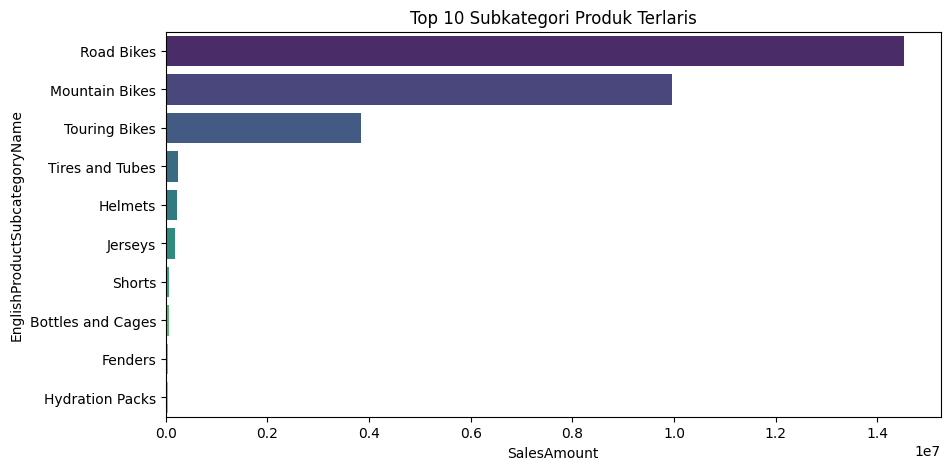

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_subcategory, x='SalesAmount', y='EnglishProductSubcategoryName', palette='viridis')
plt.title('Top 10 Subkategori Produk Terlaris')
plt.show()

### Relationship

#### hubungan Jumlah pembelian dan pendapatan pelanggan

In [23]:
customer_buy = fact_internet_sales.merge(dimention_customer_df, left_on='CustomerKey', right_on='CustomerKey')
customer_buy = customer_buy.groupby('FirstName').agg({
    'SalesAmount': 'sum',
    'YearlyIncome': 'mean',
    }).reset_index()

C:\Users\RIZKA F\AppData\Local\Temp\ipykernel_11808\2153708560.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=customer_buy, x='YearlyIncome', y='SalesAmount', palette='rocket')


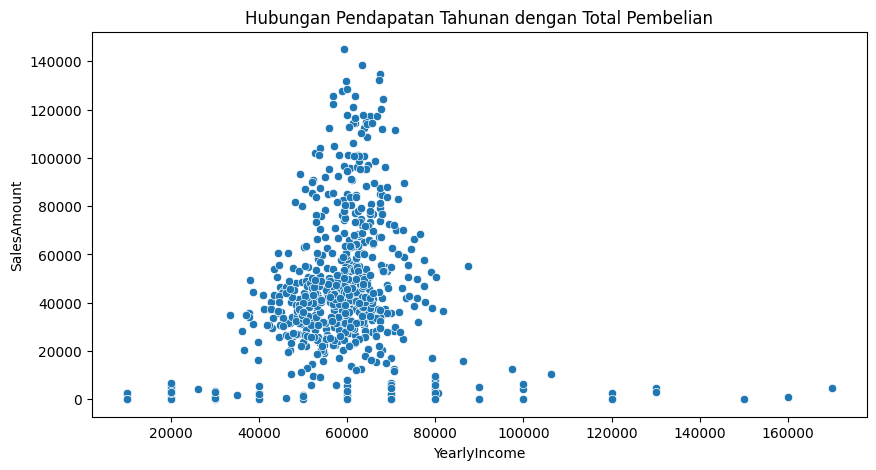

In [24]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=customer_buy, x='YearlyIncome', y='SalesAmount', palette='rocket')
plt.title('Hubungan Pendapatan Tahunan dengan Total Pembelian')
plt.show()

### Composition

#### komposisi penjualan kategori product

In [25]:
penjualan_product = fact_internet_sales.merge(dimention_product_df, left_on='ProductKey', right_on='ProductKey')
penjualan_subkategori = penjualan_product.merge(dimention_product_subcategory_df, left_on='ProductSubcategoryKey', right_on='ProductSubcategoryKey')
penjualan_kategori = penjualan_subkategori.merge(dimention_product_category_df, left_on='ProductCategoryKey', right_on='ProductCategoryKey')

In [34]:
penjualan_kategori = penjualan_kategori.groupby('EnglishProductCategoryName').agg({'SalesAmount': 'sum'}).reset_index()
penjualan_subkategori = penjualan_subkategori.groupby('EnglishProductSubcategoryName').agg({'SalesAmount': 'sum'}).reset_index()
penjualan_subkategori = penjualan_subkategori.sort_values('SalesAmount', ascending=False).head(10)

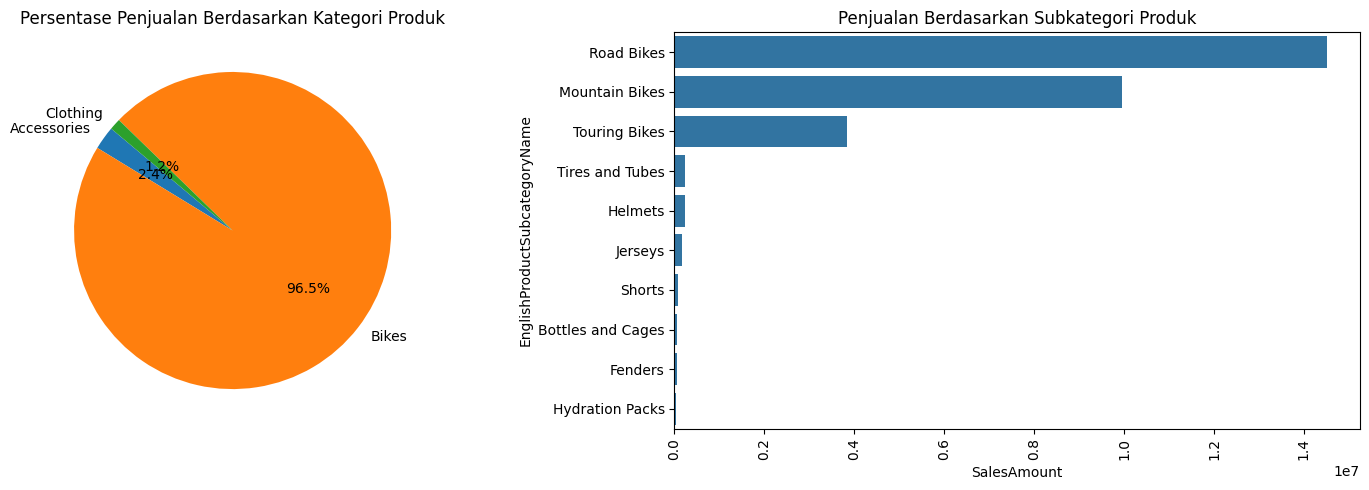

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot untuk kategori
ax[0].pie(penjualan_kategori['SalesAmount'], labels=penjualan_kategori['EnglishProductCategoryName'], autopct='%1.1f%%', startangle=140)
ax[0].set_title('Persentase Penjualan Berdasarkan Kategori Produk')

# Plot untuk subkategori
sns.barplot(data=penjualan_subkategori, y='EnglishProductSubcategoryName', x='SalesAmount', ax=ax[1])
ax[1].set_title('Penjualan Berdasarkan Subkategori Produk')
ax[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

### Distribution

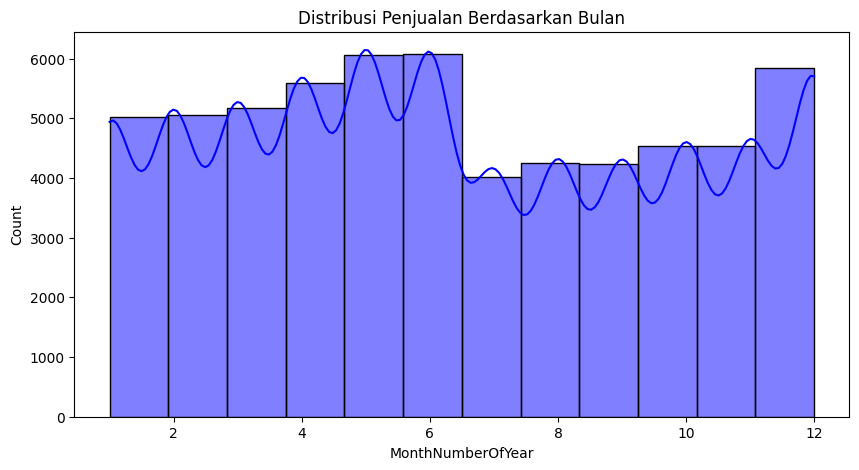

In [40]:
tren_penjualan = fact_internet_sales.merge(dimention_time_df, left_on='OrderDateKey', right_on='TimeKey')

plt.figure(figsize=(10, 5))
sns.histplot(data=tren_penjualan, x='MonthNumberOfYear', bins=12, kde=True, color='blue')
plt.title('Distribusi Penjualan Berdasarkan Bulan')
plt.show()

In [ ]:
pl

## Merge All df

In [44]:
all_df = fact_internet_sales.merge(dimention_time_df, left_on='OrderDateKey', right_on='TimeKey')
all_df = all_df.merge(dimention_product_df, left_on='ProductKey', right_on='ProductKey')
all_df = all_df.merge(dimention_product_subcategory_df, left_on='ProductSubcategoryKey', right_on='ProductSubcategoryKey')
all_df = all_df.merge(dimention_product_category_df, left_on='ProductCategoryKey', right_on='ProductCategoryKey')
all_df = all_df.merge(dimention_customer_df, left_on='CustomerKey', right_on='CustomerKey')

In [45]:
all_df.to_csv('data/all_data.csv', index=False)